In [1]:
import scanpy as sc
import singleCellHaystack as hs

# Load data

In [2]:
adata = sc.datasets.paul15()
adata

/home/diez/miniconda3/envs/singleCellHaystack/lib/python3.11/site-packages/scanpy/datasets/_datasets.py:202: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['iroot'] = 840


AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

# Preprocess

/home/diez/miniconda3/envs/singleCellHaystack/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


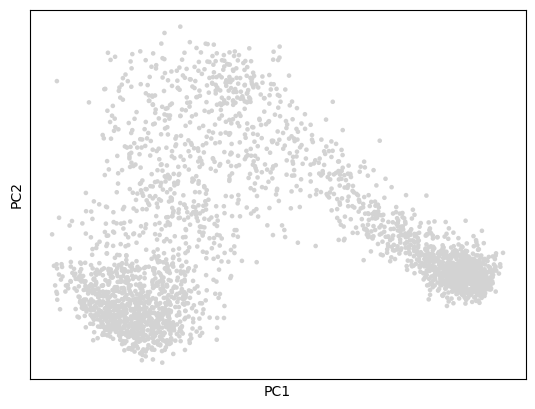

In [3]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pl.pca(adata)

/home/diez/miniconda3/envs/singleCellHaystack/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/diez/miniconda3/envs/singleCellHaystack/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/diez/miniconda3/envs/singleCellHaystack/li

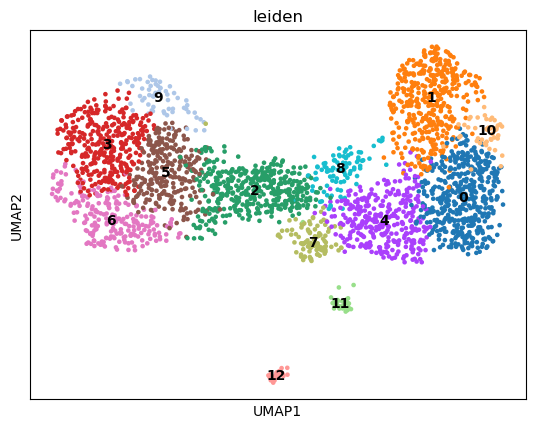

In [4]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden", legend_loc="on data")

# Calculate DPT trajectories

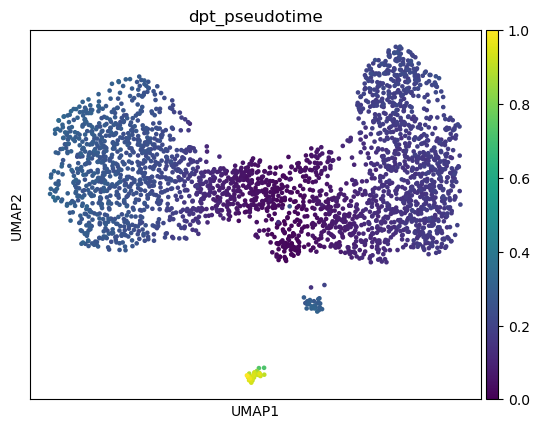

In [5]:
sc.tl.diffmap(adata)
sc.tl.dpt(adata)
sc.pl.umap(adata, color="dpt_pseudotime")

# Run singleCellHaystack

 For now there is not direct way to access the pseudotime information from AnnData object. But we can pass the expression matrix and 1D coordinates directly.

In [6]:
import numpy
pseudotime = numpy.array(adata.obs.dpt_pseudotime.to_list())
pseudotime = pseudotime.reshape(-1, 1)
pseudotime

array([[0.0275316965],
       [0.1844685227],
       [0.2824616432],
       ...,
       [0.0244765058],
       [0.1840221733],
       [0.2610901594]])

In [7]:
res = hs.haystack(adata.X, coord=pseudotime, features=adata.var_names)

> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 3451 features ...


100%|█████████████████████████████████████████████████████████████████████████████| 3451/3451 [00:01<00:00, 2068.14it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.31it/s]


> calculating P values ...
> done.


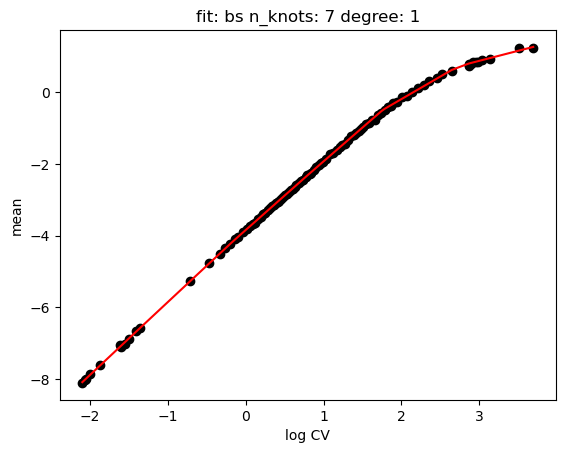

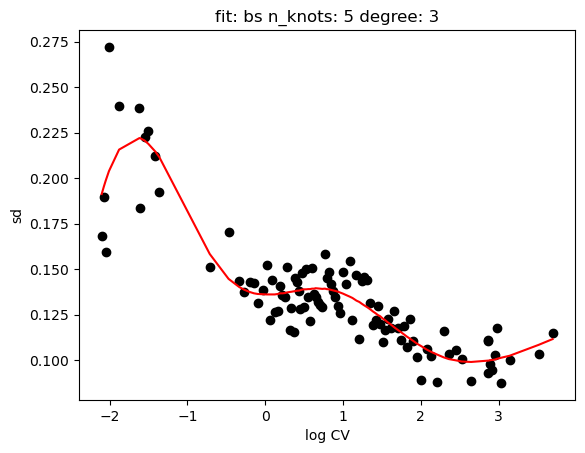

In [8]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

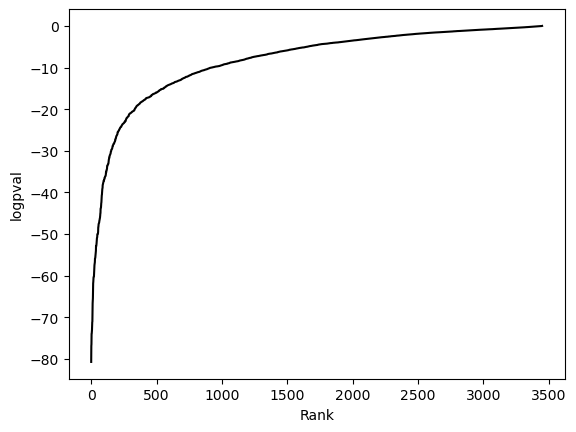

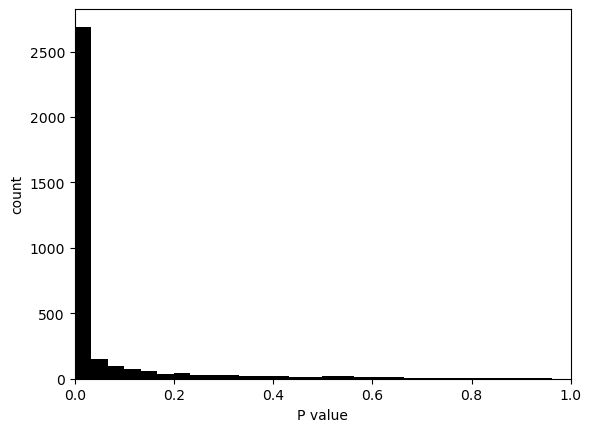

In [9]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

In [10]:
sum = res.top_features(9)
sum

,gene,KLD,CV,pval,pval_adj,logpval,logpval_adj
1121,Fam132a,0.354324,1.111779,1.907912e-81,6.584203e-78,-80.719442,-77.181497
1954,Mt2,0.476056,1.326631,1.375929e-77,4.748330e-74,-76.861404,-73.323459
2590,Rhd,0.601656,1.491535,3.467935e-77,1.196784e-73,-76.459929,-72.921984
2425,Prtn3,0.164153,0.776379,1.141090e-74,3.937903e-71,-73.942680,-70.404735
1040,Elane,0.291931,1.066940,1.240241e-74,4.280072e-71,-73.906494,-70.368549
2910,Sphk1,0.568372,1.485415,3.270921e-74,1.128795e-70,-73.485330,-69.947385
815,Ctsg,0.212397,0.907998,8.823847e-74,3.045110e-70,-73.054342,-69.516397
1072,Ermap,0.440583,1.333001,1.493464e-72,5.153945e-69,-71.825805,-68.287860
778,Cpox,0.349522,1.195660,6.859488e-72,2.367209e-68,-71.163708,-67.625763


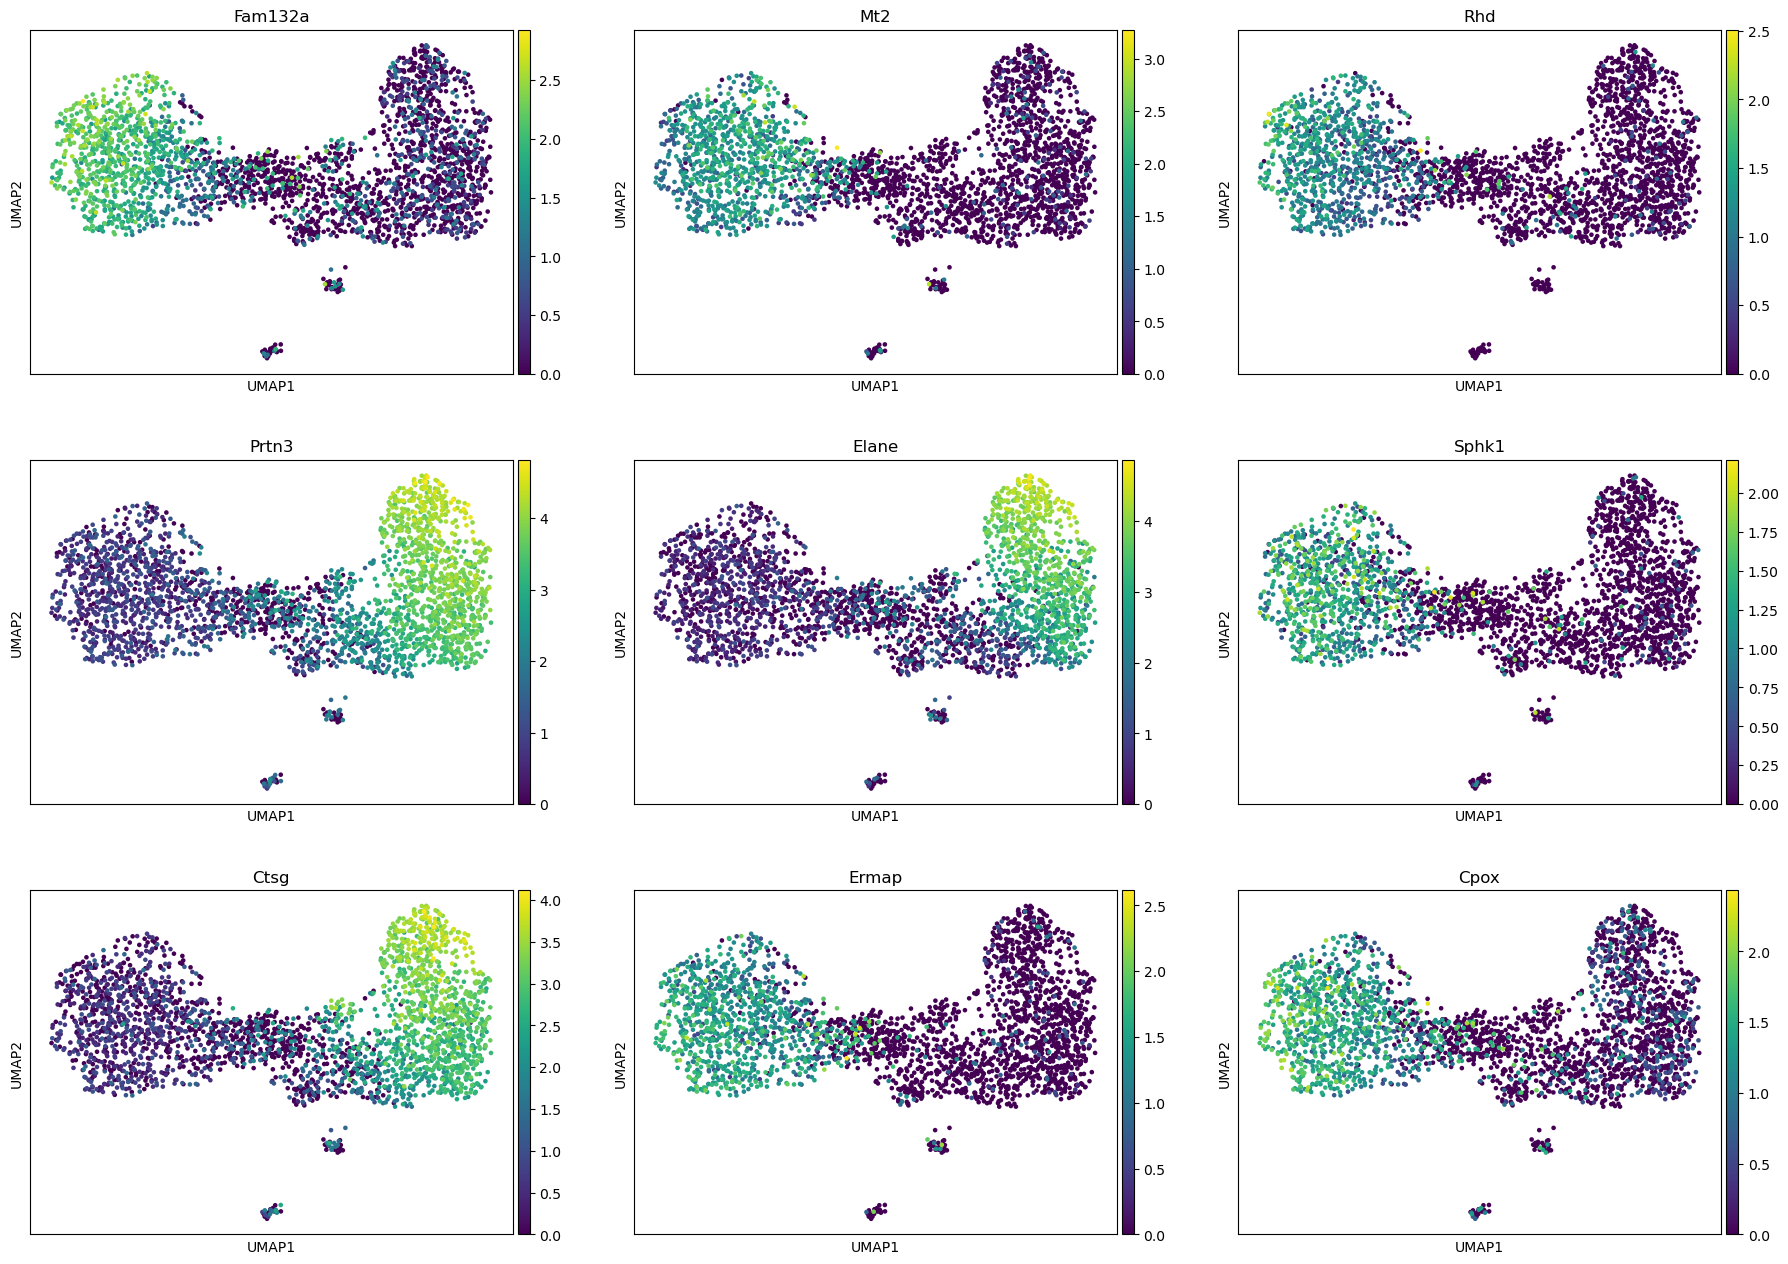

In [11]:
sc.pl.umap(adata, color=sum.gene, ncols=3)

# Export results

In [12]:
#sum.to_csv("results-trajectory.csv")